Total amount of images: 8
(8, 2, 224, 224, 3)


IndexError: index 8 is out of bounds for axis 0 with size 8

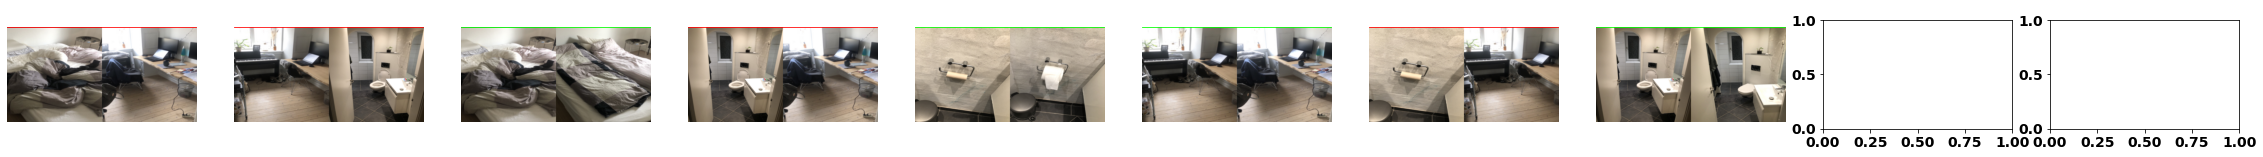

In [101]:
import sys
sys.path.append('../../utility')
import util
import numpy as np

# folders = util.load_images('../../data/dataset_pairs')
folders = util.load_images('./data')
data, labels = util.create_pairs_v2(folders)
data, labels = util.shuffle_data(data, labels)
print(data.shape)

# data = data[:10]

util.visualize(data, labels)

In [105]:
from keras.layers import GlobalAveragePooling2D, Flatten
from keras.models import Sequential, Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.resnet import ResNet50

input_shape = (224, 224, 3)

mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
mobilenet.Trainable = False

dif_list = []

for i, layer in enumerate(mobilenet.layers):
    predictions = GlobalAveragePooling2D()(mobilenet.layers[i].output)
    mobilenet_embedding = Model(inputs=mobilenet.inputs, outputs=predictions)

    dif = []
    for j in range(len(data)):

        feature_1 = mobilenet_embedding.predict(data[j][0].reshape(1, 224, 224, 3))
        feature_2 = mobilenet_embedding.predict(data[j][1].reshape(1, 224, 224, 3))
        
        similarity = util.cosine_similarity(feature_1, feature_2)
        difference = np.abs(labels[j] - similarity)
        dif.append(difference)

    sum_dif = np.sum(dif) / len(dif)
    dif_list.append(sum_dif)
    print(i, '\t/', len(mobilenet.layers), "\t{:.4f}\t".format(sum_dif), layer.name,)


0 	/ 154 	0.4998	 input_27
1 	/ 154 	0.4996	 Conv1
2 	/ 154 	0.4998	 bn_Conv1
3 	/ 154 	0.4998	 Conv1_relu
4 	/ 154 	0.4996	 expanded_conv_depthwise
5 	/ 154 	0.5000	 expanded_conv_depthwise_BN
6 	/ 154 	0.5000	 expanded_conv_depthwise_relu
7 	/ 154 	0.5000	 expanded_conv_project
8 	/ 154 	0.4983	 expanded_conv_project_BN
9 	/ 154 	0.4992	 block_1_expand
10 	/ 154 	0.5000	 block_1_expand_BN
11 	/ 154 	0.4997	 block_1_expand_relu
12 	/ 154 	0.4997	 block_1_pad
13 	/ 154 	0.4994	 block_1_depthwise
14 	/ 154 	0.4990	 block_1_depthwise_BN
15 	/ 154 	0.4997	 block_1_depthwise_relu
16 	/ 154 	0.4995	 block_1_project
17 	/ 154 	0.4950	 block_1_project_BN
18 	/ 154 	0.4963	 block_2_expand
19 	/ 154 	0.4992	 block_2_expand_BN
20 	/ 154 	0.4993	 block_2_expand_relu
21 	/ 154 	0.5000	 block_2_depthwise
22 	/ 154 	0.4997	 block_2_depthwise_BN
23 	/ 154 	0.4998	 block_2_depthwise_relu
24 	/ 154 	0.4999	 block_2_project
25 	/ 154 	0.4909	 block_2_project_BN
26 	/ 154 	0.4774	 block_2_add
27 	/ 154 	

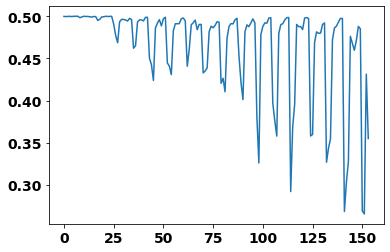

Conv_1 0.2658607270568609 151


In [106]:
# visualize dif
import matplotlib.pyplot as plt
plt.plot(dif_list)
plt.show()
print(mobilenet.layers[np.argmin(dif_list)].name, np.min(dif_list), np.argmin(dif_list))

Label: 0
Predi: 0.1867504


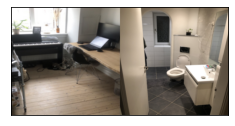

Label: 1
Predi: 0.61896086


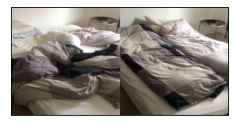

Label: 0
Predi: 0.25276974


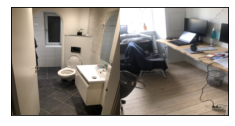

Label: 1
Predi: 0.73768187


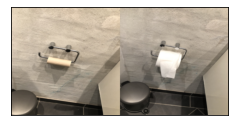

Label: 1
Predi: 0.685011


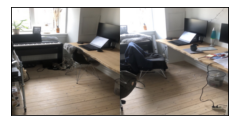

Label: 0
Predi: 0.3015248


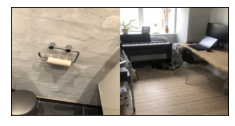

Label: 1
Predi: 0.8991956


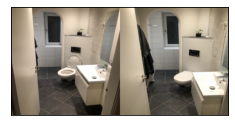

IndexError: index 8 is out of bounds for axis 0 with size 8

In [104]:
pred = GlobalAveragePooling2D()(mobilenet.layers[150].output)
mob = Model(inputs=mobilenet.inputs, outputs=pred)
offset = 1
for index in range(offset, offset+10):
    img1 = data[index][0]
    img2 = data[index][1]
    f1 = mob.predict(img1.reshape(1, 224, 224, 3))
    f2 = mob.predict(img2.reshape(1, 224, 224, 3))
    print("Label:", labels[index])
    print("Predi:",util.cosine_similarity(f1, f2))
    util.visualize_images(img1, img2)